In [1]:
#This is the documentation of the visualization for the report of GDV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load the data
movies = pd.read_csv('data/ml-latest/movies.csv')
ratings = pd.read_csv('data/ml-latest/ratings.csv')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
#check if there are movies withj no year
movies[movies.title.str.contains('\(\d\d\d\d\)') == False]

,movieId,title,genres
10023,32930,Category 6: Day of Destruction,Action|Drama
10613,40697,Babylon 5,Sci-Fi
15719,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller
17444,87442,"Bicycle, Spoon, Apple (Bicicleta, cullera, poma)",Documentary
22651,107434,Diplomatic Immunity (2009– ),Comedy
...,...,...,...
57504,192339,The Sign of Three,(no genres listed)
57674,192829,Parwaaz Hai Junoon,Adventure|Children|Romance
57789,193149,¿Qué te juegas?,(no genres listed)
57903,193443,Wall,(no genres listed)


In [6]:
#extract the year from the title
movies['year'] = movies.title.str.extract('(\d\d\d\d)',expand=False)
#convert the year to numeric
movies['year'] = pd.to_numeric(movies['year'], errors='coerce')

#put genres in a list
movies['genres'] = movies.genres.str.split('|')

In [7]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995.0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995.0
4,5,Father of the Bride Part II (1995),[Comedy],1995.0


In [8]:
# explode the genres
movies_exploded = movies.explode('genres')
#remove films without genre
movies_exploded = movies_exploded[movies_exploded.genres != '(no genres listed)']
#for performance reasons we only take movies from 1940 - 2018
#remove films with year greater than 2023
movies_exploded = movies_exploded[movies_exploded.year <= 2018]
#remove movies older than 1900
movies_exploded = movies_exploded[movies_exploded.year >= 1940]


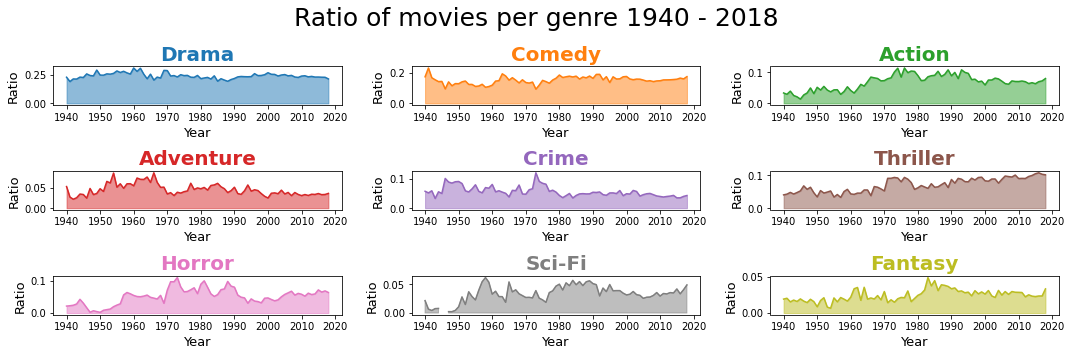

In [9]:
#for performance reasons we only take some genres
genres = ['Drama', 'Comedy', 'Action', 'Adventure', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Fantasy']

#visualize stacked area charts for the genres over the years for each genre a plot

fig, axes = plt.subplots(3, 3, figsize=(15, 5))
for i, genre in enumerate(genres):
    ax = axes[i // 3, i % 3]
    #show the count relative to the total number of movies per year
    movies_exploded[movies_exploded.genres == genre].groupby('year').count().title.div(movies_exploded.groupby('year').count().title).plot(ax=ax)
    ax.set_title(genre)
    #make area chart
    ax.fill_between(movies_exploded[movies_exploded.genres == genre].groupby('year').count().title.div(movies_exploded.groupby('year').count().title).index, movies_exploded[movies_exploded.genres == genre].groupby('year').count().title.div(movies_exploded.groupby('year').count().title).values, alpha=0.5).set_color('C' + str(i))
    ax.lines[0].set_color('C' + str(i))
    ax.set_xlabel('Year')
    ax.set_ylabel('Ratio')
    #make the font of the title bigger and bold and the color the same as the line
    ax.title.set_fontweight('bold')
    ax.title.set_fontsize(20)
    ax.title.set_color('C' + str(i))
    #make the font of the x and y axis labels bigger
    ax.xaxis.label.set_fontsize(13)
    ax.yaxis.label.set_fontsize(13)

#set title of the whole figure
fig.suptitle('Ratio of movies per genre 1940 - 2018', fontsize=25)

#make the plots look nicer
fig.tight_layout()
#change the color of the line of each plot




Text(0, 0.5, 'Count')

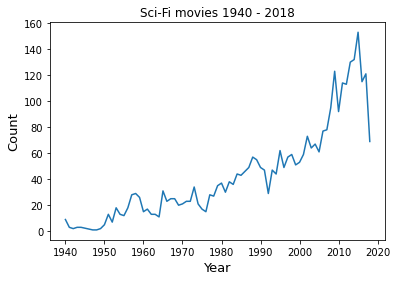

In [10]:
#plot a area chart for sci fi movies
movies_exploded[movies_exploded.genres == 'Sci-Fi'].groupby('year').count().title.plot()


#make area chart
plt.title('Sci-Fi movies 1940 - 2018')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Count', fontsize=13)


Text(0, 0.5, 'Count')

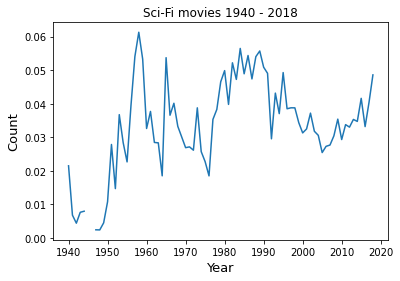

In [11]:
#plot a area chart for sci fi movies
movies_exploded[movies_exploded.genres == 'Sci-Fi'].groupby('year').count().title.div(movies_exploded.groupby('year').count().title).plot()


#make area chart
plt.title('Sci-Fi movies 1940 - 2018')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Count', fontsize=13)

In [12]:
#remov movies older than 1940 and newer than 2018
movies= movies[movies.year <= 2018]
movies = movies[movies.year >= 1940]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


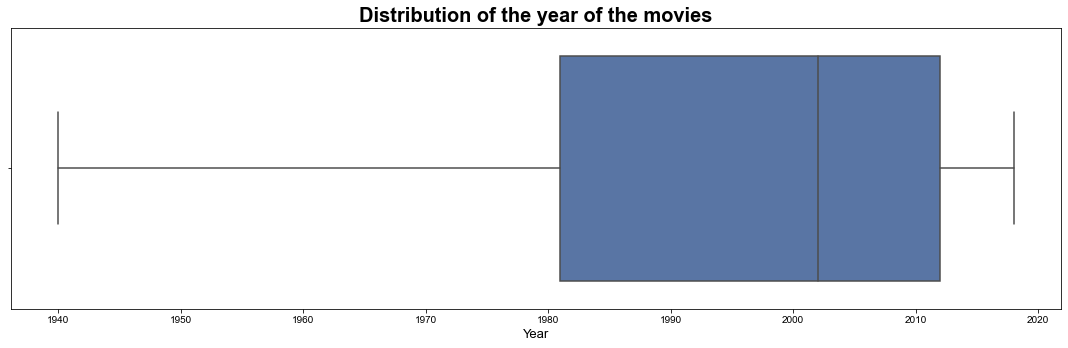

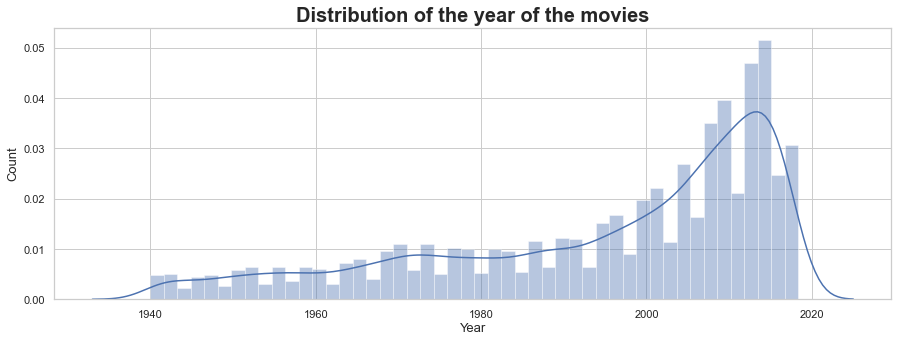

In [13]:
#how are the year distributed is there a normal distribution or a bias
#visualize the distribution of the year with a boxplot
fig, ax = plt.subplots(figsize=(15, 5))
sns.set_theme(style="whitegrid")
sns.boxplot(movies.year, ax=ax)
#set x and y label
ax.set_xlabel('Year')
ax.set_title('Distribution of the year of the movies')
#make the font of the title bigger and bold
ax.title.set_fontweight('bold')
ax.title.set_fontsize(20)
#make the font of the x and y axis labels bigger
ax.xaxis.label.set_fontsize(13)
#make the plots look nicer
fig.tight_layout()
#set nice color theme


#show the distribution of the year with a histogram and plot a normal distribution
fig, ax = plt.subplots(figsize=(15, 5))
#set the number of bins to 20

#calculate the bins wirh the Freedman-Diaconis rule
#https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

binWidth = 2 * (movies.year.quantile(0.75) - movies.year.quantile(0.25)) * (movies.year.count() ** (-1/3))
bins = np.arange(movies.year.min(), movies.year.max() + binWidth, binWidth)

sns.distplot(movies.year, bins=bins, ax=ax)
#set x and y label
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Distribution of the year of the movies')
#make the font of the title bigger and bold
ax.title.set_fontweight('bold')
ax.title.set_fontsize(20)
#make the font of the x and y axis labels bigger
ax.xaxis.label.set_fontsize(13)
ax.yaxis.label.set_fontsize(13)

    

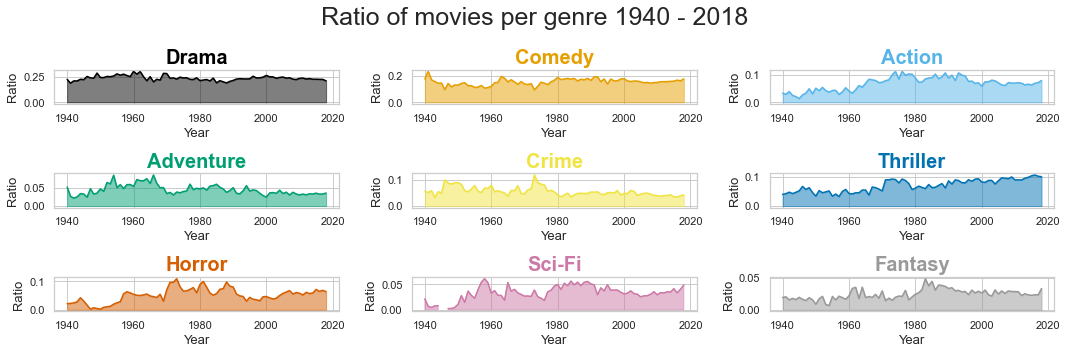

In [14]:
#make the first plot for color blind people

import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


#okable & ito colorblind friendly palette
colors = ['#000000','#E69F00','#56B4E9','#009E73','#F0E442','#0072B2','#D55E00','#CC79A7','#999999']
#visualize stacked area charts for the genres over the years for each genre a plot

fig, axes = plt.subplots(3, 3, figsize=(15, 5))
for i, genre in enumerate(genres):
    ax = axes[i // 3, i % 3]
    #show the count relative to the total number of movies per year
    movies_exploded[movies_exploded.genres == genre].groupby('year').count().title.div(movies_exploded.groupby('year').count().title).plot(ax=ax)
    ax.set_title(genre)
    #make area chart
    ax.fill_between(movies_exploded[movies_exploded.genres == genre].groupby('year').count().title.div(movies_exploded.groupby('year').count().title).index, movies_exploded[movies_exploded.genres == genre].groupby('year').count().title.div(movies_exploded.groupby('year').count().title).values, alpha=0.5).set_color(colors[i])
    ax.lines[0].set_color(colors[i])
    ax.set_xlabel('Year')
    ax.set_ylabel('Ratio')
    #make the font of the title bigger and bold and the color the same as the line
    ax.title.set_fontweight('bold')
    ax.title.set_fontsize(20)
    ax.title.set_color(colors[i])
    #make the font of the x and y axis labels bigger
    ax.xaxis.label.set_fontsize(13)
    ax.yaxis.label.set_fontsize(13)

#set title of the whole figure
fig.suptitle('Ratio of movies per genre 1940 - 2018', fontsize=25)

#make the plots look nicer
fig.tight_layout()
#change the color of the line of each plot




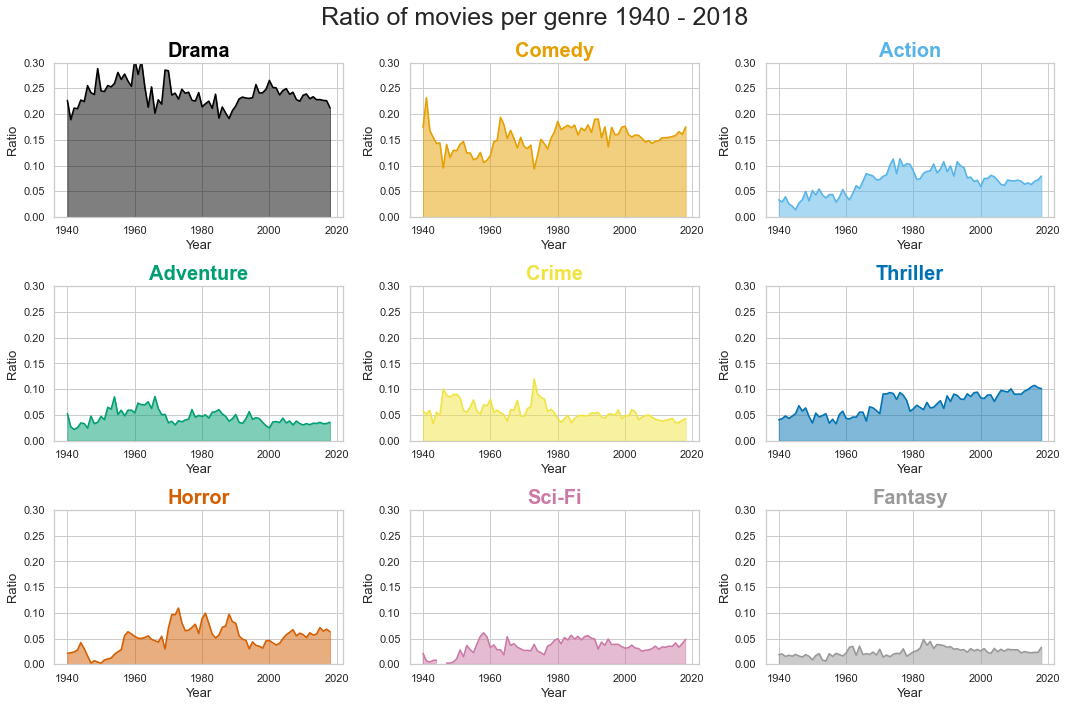

In [15]:
#make the first plot for color blind people

import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


#okable & ito colorblind friendly palette
colors = ['#000000','#E69F00','#56B4E9','#009E73','#F0E442','#0072B2','#D55E00','#CC79A7','#999999']
#visualize stacked area charts for the genres over the years for each genre a plot

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for i, genre in enumerate(genres):
    ax = axes[i // 3, i % 3]
    #show the count relative to the total number of movies per year
    movies_exploded[movies_exploded.genres == genre].groupby('year').count().title.div(movies_exploded.groupby('year').count().title).plot(ax=ax)
    ax.set_title(genre)
    #make area chart
    ax.fill_between(movies_exploded[movies_exploded.genres == genre].groupby('year').count().title.div(movies_exploded.groupby('year').count().title).index, movies_exploded[movies_exploded.genres == genre].groupby('year').count().title.div(movies_exploded.groupby('year').count().title).values, alpha=0.5).set_color(colors[i])
    ax.lines[0].set_color(colors[i])
    ax.set_xlabel('Year')
    ax.set_ylabel('Ratio')
    #make the font of the title bigger and bold and the color the same as the line
    ax.title.set_fontweight('bold')
    ax.title.set_fontsize(20)
    ax.title.set_color(colors[i])
    #make the font of the x and y axis labels bigger
    ax.xaxis.label.set_fontsize(13)
    ax.yaxis.label.set_fontsize(13)
    #set the plot height corresponding to the ratio

    #set the height of the plot to the ratio of the genre
    ax.set_ylim(0, 0.3)




#set title of the whole figure
fig.suptitle('Ratio of movies per genre 1940 - 2018', fontsize=25)

#make the plots look nicer
fig.tight_layout()
#change the color of the line of each plot




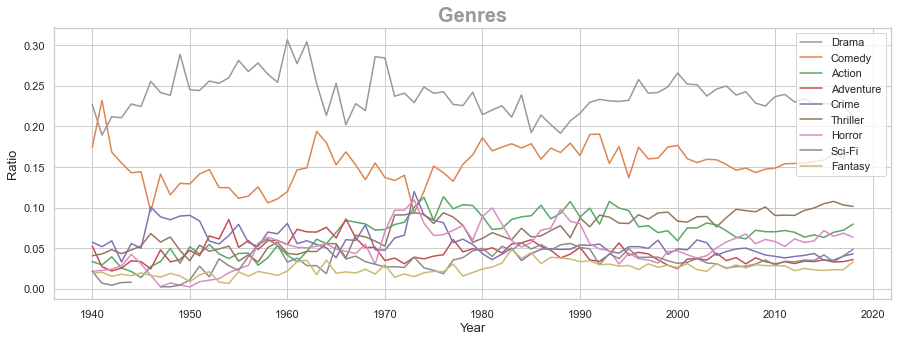

In [16]:
#plot exactly the same plot but in one plot
fig, ax = plt.subplots(figsize=(15, 5))
for i, genre in enumerate(genres):
    #show the count relative to the total number of movies per year
    movies_exploded[movies_exploded.genres == genre].groupby('year').count().title.div(movies_exploded.groupby('year').count().title).plot(ax=ax)
    ax.set_title("Genres")
    #make area chart
    ax.lines[0].set_color(colors[i])
    ax.set_xlabel('Year')
    ax.set_ylabel('Ratio')
    #make the font of the title bigger and bold and the color the same as the line
    ax.title.set_fontweight('bold')
    ax.title.set_fontsize(20)
    ax.title.set_color(colors[i])
    #make the font of the x and y axis labels bigger
    ax.xaxis.label.set_fontsize(13)
    ax.yaxis.label.set_fontsize(13)
    #set legend
    ax.legend(genres)

#set title of the whole figure


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


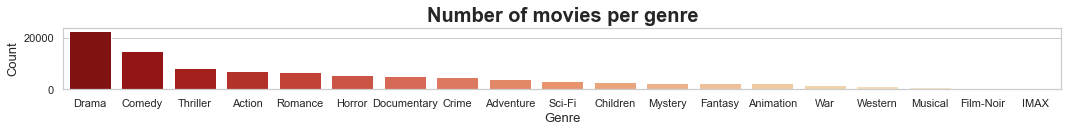

In [17]:
#bar plot of the number of movies per genre and represent count with color hue
fig, ax = plt.subplots(figsize=(15, 2))
sns.countplot(movies_exploded.genres, ax=ax, palette='OrRd_r',order=movies_exploded.genres.value_counts().index)
#set x and y label
ax.set_xlabel('Genre')
ax.set_ylabel('Count')
ax.set_title('Number of movies per genre')
#make the font of the title bigger and bold
ax.title.set_fontweight('bold')
ax.title.set_fontsize(20)

#make the font of the x and y axis labels bigger
ax.xaxis.label.set_fontsize(13)
ax.yaxis.label.set_fontsize(13)
#make the plots look nicer
fig.tight_layout()

In [18]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [19]:
#join the ratings and movies dataframes
movies_ratings = movies.merge(ratings, on='movieId', how='inner')


In [20]:
movies_ratings.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0,4,4.0,1113765937
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0,10,5.0,948885850
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0,14,4.5,1442169375
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0,15,4.0,1370810063
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0,22,4.0,1237622631


In [21]:
#conver the timestamp to datetime
movies_ratings['timestamp'] = pd.to_datetime(movies_ratings['timestamp'], unit='s')

In [22]:
starwars_df = movies_ratings[movies_ratings.title.str.contains('Star Wars: Episode')]
#grop by timestamp year and title
starwars_df = starwars_df.groupby([starwars_df.timestamp.dt.year, 'title']).mean().reset_index()


/var/folders/v2/51sbk7ln57325w479zxv0dqc0000gn/T/ipykernel_16189/1340964108.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  starwars_df = starwars_df.groupby([starwars_df.timestamp.dt.year, 'title']).mean().reset_index()


In [23]:
starwars_df.head()

,timestamp,title,movieId,year,userId,rating
0,1996,Star Wars: Episode IV - A New Hope (1977),260.0,1977.0,143844.204809,4.101990
1,1996,Star Wars: Episode V - The Empire Strikes Back...,1196.0,1980.0,146203.983718,4.227951
2,1996,Star Wars: Episode VI - Return of the Jedi (1983),1210.0,1983.0,147012.298422,4.177905
3,1997,Star Wars: Episode IV - A New Hope (1977),260.0,1977.0,140062.162300,4.268937
4,1997,Star Wars: Episode V - The Empire Strikes Back...,1196.0,1980.0,140528.626050,4.271709


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


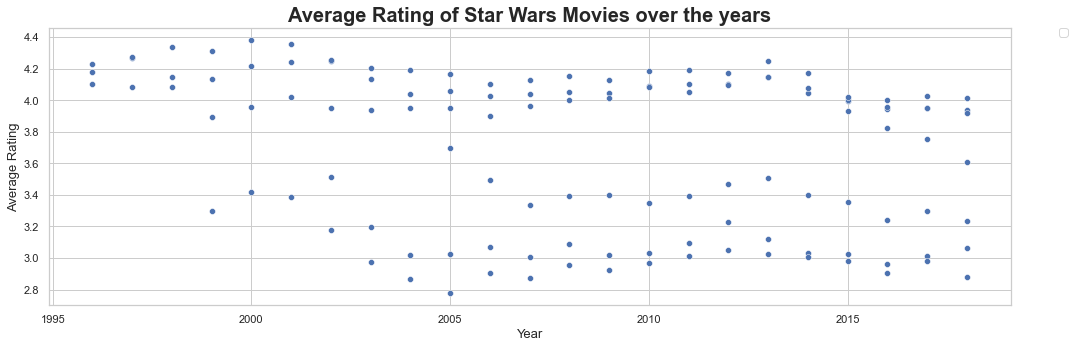

In [24]:
#scatter plot of each star wars movie with the number of ratings and the average rating
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(starwars_df.timestamp, starwars_df.rating, ax=ax, palette='dark')
#set x and y label
ax.set_xlabel('Year')
ax.set_ylabel('Average Rating')
ax.set_title('Average Rating of Star Wars Movies over the years')
#make the font of the title bigger and bold
ax.title.set_fontweight('bold')
ax.title.set_fontsize(20)
#make the font of the x and y axis labels bigger
ax.xaxis.label.set_fontsize(13)
ax.yaxis.label.set_fontsize(13)

#put legend outside of the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#make the plots look nicer
fig.tight_layout()




/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


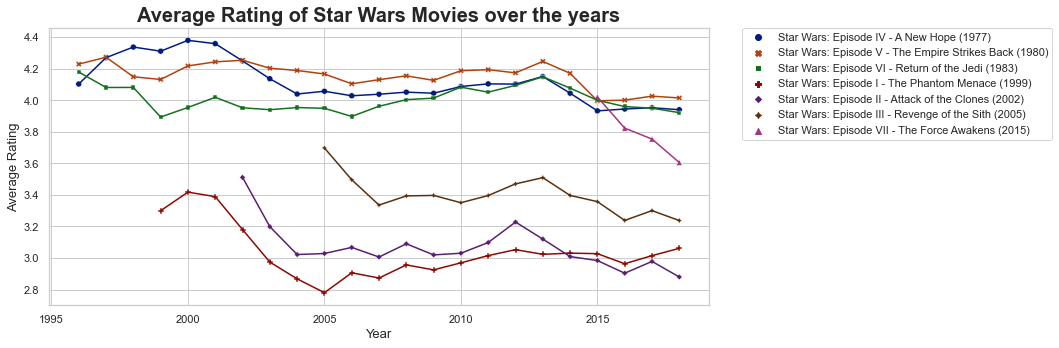

In [25]:
#scatter plot of each star wars movie with the number of ratings and the average rating
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(starwars_df.timestamp, starwars_df.rating, ax=ax, hue=starwars_df.title, style=starwars_df.title, palette='dark')
sns.lineplot(starwars_df.timestamp, starwars_df.rating, ax=ax, hue=starwars_df.title, palette='dark', legend=False)
#set x and y label
ax.set_xlabel('Year')
ax.set_ylabel('Average Rating')
ax.set_title('Average Rating of Star Wars Movies over the years')
#make the font of the title bigger and bold
ax.title.set_fontweight('bold')
ax.title.set_fontsize(20)
#make the font of the x and y axis labels bigger
ax.xaxis.label.set_fontsize(13)
ax.yaxis.label.set_fontsize(13)


#put legend outside of the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#make the plots look nicer
fig.tight_layout()




In [26]:
movies_ratings_exploded = movies_ratings.explode('genres')

In [27]:
movies_ratings.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0,4,4.0,2005-04-17 19:25:37
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0,10,5.0,2000-01-26 11:24:10
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0,14,4.5,2015-09-13 18:36:15
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0,15,4.0,2013-06-09 20:34:23
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0,22,4.0,2009-03-21 08:03:51


In [29]:
movies_ratings_exploded.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure,1995.0,4,4.0,2005-04-17 19:25:37
0,1,Toy Story (1995),Animation,1995.0,4,4.0,2005-04-17 19:25:37
0,1,Toy Story (1995),Children,1995.0,4,4.0,2005-04-17 19:25:37
0,1,Toy Story (1995),Comedy,1995.0,4,4.0,2005-04-17 19:25:37
0,1,Toy Story (1995),Fantasy,1995.0,4,4.0,2005-04-17 19:25:37


In [30]:
#find user with most lowest ratings but not 0.5
movies_ratings_exploded[movies_ratings_exploded.rating != 0.5].groupby('userId').aggregate({'rating': ['mean', 'count']}).sort_values(by=('rating', 'mean')).head()


rating      
         mean count
userId             
199697    1.0    37
172653    1.0     3
80317     1.0     1
211087    1.0     4
147904    1.0     4

In [31]:
#find user with most ratings that are high
movies_ratings_exploded[movies_ratings_exploded.rating != 5].groupby('userId').aggregate({'rating': ['mean', 'count']}).sort_values(by=('rating', 'mean'), ascending=False).head()

rating      
         mean count
userId             
85637     4.5    14
89453     4.5     3
139609    4.5     5
89223     4.5     3
242038    4.5     5

In [32]:
#are there more rating for movies with a higher rating?
movies_ratings_exploded.groupby('rating').count().title
 



rating
0.5     1178204
1.0     2279977
1.5     1199193
2.0     4871505
2.5     3745977
3.0    14654654
3.5     9296542
4.0    19715147
4.5     6520984
5.0    10936440
Name: title, dtype: int64